# Tasca Feature Engineering
## Nivell 1
### Exerici 1 

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.




In [92]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt

In [147]:
## importem un data set de les olimpades 
data = pd.read_csv(r'C:/Users/adria/tasca9/athlete_events.csv')

In [148]:
data.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [149]:
data.isna().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [150]:
data_raw = data[['Age','Height','Weight']]
target_data=data[['Sex']]



In [151]:
## separem les columnes  numeriques

numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])



In [152]:
print('numerical data:\n',numerical_data.keys())
numerical_data.isna().sum()

numerical data:
 Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')


ID            0
Age        9474
Height    60171
Weight    62875
Year          0
dtype: int64

In [153]:
print('categorical data:\n',categorical_data.keys())

categorical data:
 Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')


In [154]:
## extraiem les variables categoriques que ens interesen
categorical_data = categorical_data[['Sex','Sport','Medal']].copy()
categorical_data.keys()

Index(['Sex', 'Sport', 'Medal'], dtype='object')

In [155]:
## standerizem  numerical_data amb StandardScaler
## primer substituim tots els valors nulls per la mitjana
numerical_data.isna().sum()
for k in numerical_data:
    if numerical_data[k].isnull().values.any()== True:
        numerical_data[k] = numerical_data[k].fillna(round(numerical_data[k].mean(),1))
        
        
numerical_data.isna().sum()

<ipython-input-155-392a439668ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data[k] = numerical_data[k].fillna(round(numerical_data[k].mean(),1))


ID        0
Age       0
Height    0
Weight    0
Year      0
dtype: int64

In [156]:
## utilitzem StandardScaler() per  escalar  numerical_data
sc = StandardScaler()
data[numerical_data.columns] = sc.fit_transform(numerical_data)

In [157]:
##convertim  a One hot Encoding els atribut categorics
dum = pd.get_dummies(categorical_data)


In [158]:
result = pd.concat([data,dum],axis=1)

In [159]:
result

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Silver
0,-1.748951,A Dijiang,M,-0.248120,0.503301,0.739436,China,CHN,1992 Summer,0.455911,...,0,0,0,0,0,0,0,0,0,0
1,-1.748926,A Lamusi,M,-0.407334,-0.574506,-0.851063,China,CHN,2012 Summer,1.125309,...,0,0,0,0,0,0,0,0,0,0
2,-1.748900,Gunnar Nielsen Aaby,M,-0.248120,-0.003268,-0.000146,Denmark,DEN,1920 Summer,-1.953923,...,0,0,0,0,0,0,0,0,0,0
3,-1.748874,Edgar Lindenau Aabye,M,1.344021,-0.003268,-0.000146,Denmark/Sweden,DEN,1900 Summer,-2.623321,...,0,0,1,0,0,0,0,0,1,0
4,-1.748849,Christine Jacoba Aaftink,F,-0.725762,1.042205,0.898486,Netherlands,NED,1988 Winter,0.322031,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1.725172,Andrzej ya,M,0.547951,0.395521,1.455161,Poland-1,POL,1976 Winter,-0.079608,...,0,0,0,0,0,0,0,0,0,0
271112,1.725198,Piotr ya,M,0.229522,0.072178,-0.930588,Poland,POL,2014 Winter,1.192249,...,0,0,0,0,0,0,0,0,0,0
271113,1.725198,Piotr ya,M,0.229522,0.072178,-0.930588,Poland,POL,2014 Winter,1.192249,...,0,0,0,0,0,0,0,0,0,0
271114,1.725224,Tomasz Ireneusz ya,M,0.707165,1.042205,2.011836,Poland,POL,1998 Winter,0.656731,...,0,0,0,0,0,0,0,0,0,0


 # Nivell 2
 ## Exercici 2
 Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.



In [160]:
## Apliquem PCA a les variables numeriques Age, Height i Weight
## farem l'analisis d'aquestes tres variables amb l'objectiu de determinar el genere on M =1 i F=2
target_data



,Sex
0,M
1,M
2,M
3,M
4,F
...,...
271111,M
271112,M
271113,M
271114,M


In [161]:
num_data= data[['Age','Height','Weight','Year']]
num_data

,Age,Height,Weight,Year
0,-0.248120,0.503301,0.739436,0.455911
1,-0.407334,-0.574506,-0.851063,1.125309
2,-0.248120,-0.003268,-0.000146,-1.953923
3,1.344021,-0.003268,-0.000146,-2.623321
4,-0.725762,1.042205,0.898486,0.322031
...,...,...,...,...
271111,0.547951,0.395521,1.455161,-0.079608
271112,0.229522,0.072178,-0.930588,1.192249
271113,0.229522,0.072178,-0.930588,1.192249
271114,0.707165,1.042205,2.011836,0.656731


In [162]:
pca = PCA(n_components=2)


In [163]:
pca.fit(num_data)

PCA(n_components=2)

In [164]:
transformed= pca.transform(num_data)

In [165]:
num_data.shape

(271116, 4)

In [166]:
transformed.shape

(271116, 2)

In [167]:
transformed

array([[ 0.80518472, -0.61948344],
       [-1.06750544, -0.98749323],
       [-0.06948447,  1.3465745 ],
       ...,
       [-0.53717866, -0.71715292],
       [ 2.27031709, -0.33355897],
       [ 2.41280025, -0.03902366]])

In [168]:
df_pca = pd.DataFrame(transformed)
df_pca['Sex'] = target_data.to_numpy()
df_pca.rename(columns={0: 'PCA_1', 1: 'PCA_2'}, inplace=True)


In [169]:
df_pca

,PCA_1,PCA_2,Sex
0,0.805185,-0.619483,M
1,-1.067505,-0.987493,M
2,-0.069484,1.346575,M
3,0.280582,2.854245,M
4,1.177837,-0.893319,F
...,...,...,...
271111,1.401180,0.252491,M
271112,-0.537179,-0.717153,M
271113,-0.537179,-0.717153,M
271114,2.270317,-0.333559,M


Text(0, 0.5, 'PCA_2')

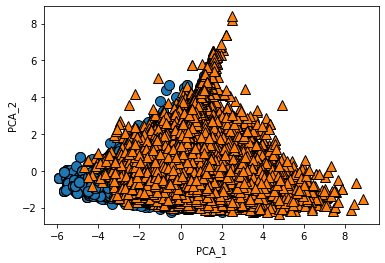

In [170]:
mglearn.discrete_scatter(df_pca['PCA_1'],df_pca['PCA_2'],df_pca['Sex'])

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')


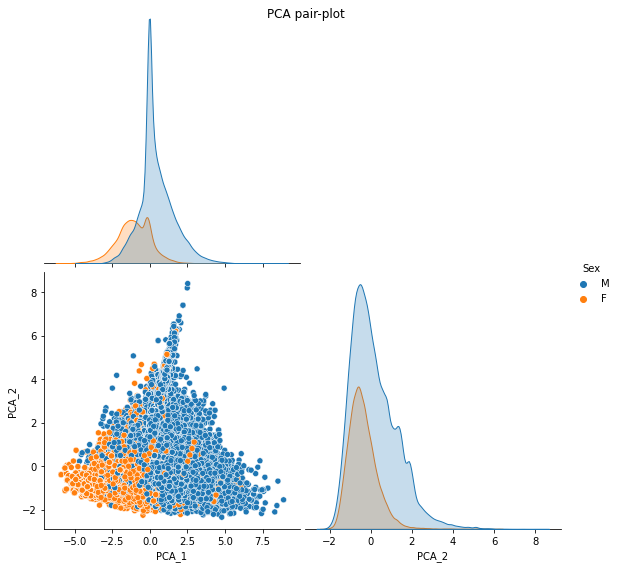

In [171]:


plot = sns.pairplot(df_pca, hue='Sex', corner=True, height=4)
plot.fig.suptitle('PCA pair-plot');


# Nivell 3
##  Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

<AxesSubplot:>

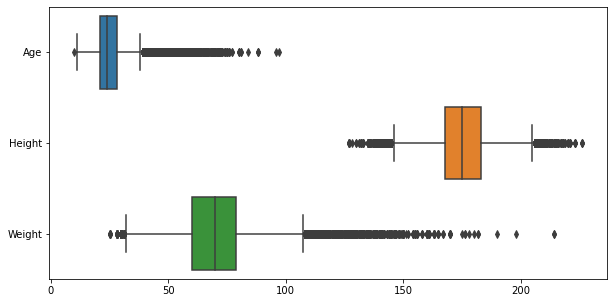

In [172]:
## primer visualitzem  en un scatterplot per veure  la dispersió dels valors en els atributs  Age, Height i Weight sense tractament
plt.figure(figsize=(10,5))
sns.boxplot(data=data_raw,orient='h')


In [173]:
data_raw.describe()


,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


<AxesSubplot:>

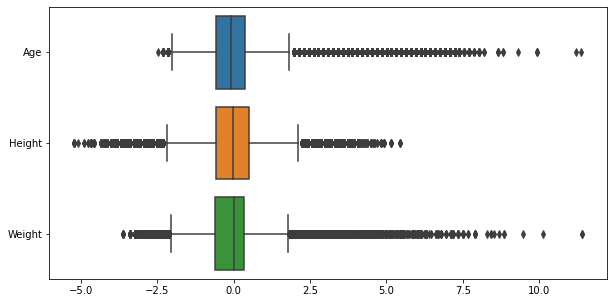

In [174]:
## ara analitzarem a partir de escalar les dades
plt.figure(figsize=(10,5))
sns.boxplot(data=num_data[['Age','Height','Weight']],orient='h')



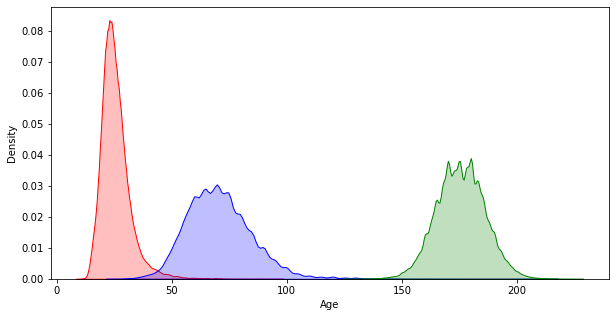

In [175]:

#sns.histplot(data_raw, ylabel = data_raw.mean())
plt.figure(figsize=(10,5))
fig = sns.kdeplot(data_raw['Age'], shade=True, color="r")
fig = sns.kdeplot(data_raw['Weight'], shade=True, color="b")
fig = sns.kdeplot(data_raw['Height'], shade=True, color="g")
plt.show()

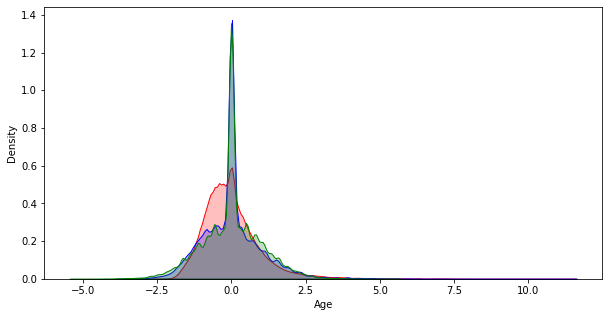

In [176]:
plt.figure(figsize=(10,5))
fig = sns.kdeplot(num_data['Age'], shade=True, color="r")
fig = sns.kdeplot(num_data['Weight'], shade=True, color="b")
fig = sns.kdeplot(num_data['Height'], shade=True, color="g")
plt.show()

Veiem que escalant les dades  estan mes acotades en un domini menor